In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 10,000 Data Set

In [2]:
data = pd.read_csv('../artifacts/student_risk_dataset_int.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             10000 non-null  int64  
 1   Attendance Rate (%)                10000 non-null  float64
 2   Course Engagement (%)              10000 non-null  float64
 3   Previous Academic Performance (%)  10000 non-null  float64
 4   Study Hours                        10000 non-null  float64
 5   Extracurricular                    10000 non-null  int64  
 6   Mother Qualification               10000 non-null  int64  
 7   Father Qualification               10000 non-null  int64  
 8   Health Issues                      10000 non-null  int64  
 9   Disciplinary Actions               10000 non-null  int64  
 10  Learning Disabilities              10000 non-null  int64  
 11  Socioeconomic Status               10000 non-null  int6

## Data Preprocessing

In [3]:
data.head()

,Gender,Attendance Rate (%),Course Engagement (%),Previous Academic Performance (%),Study Hours,Extracurricular,Mother Qualification,Father Qualification,Health Issues,Disciplinary Actions,Learning Disabilities,Socioeconomic Status,Risk
0,0,58.0,50.0,51.0,3.0,0,0,1,0,0,0,2,1
1,1,59.0,55.0,51.0,1.0,1,0,1,1,1,0,1,1
2,0,67.0,51.0,59.0,3.0,1,2,2,1,1,0,0,1
3,0,57.0,42.0,64.0,1.0,1,1,0,1,0,0,1,1
4,0,67.0,44.0,58.0,3.0,0,2,2,1,0,0,1,1


In [4]:
data.duplicated().sum()

np.int64(6)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,10000.0,0.4987,0.500023,0.0,0.0,0.0,1.0,1.0
Attendance Rate (%),10000.0,79.4269,15.510987,50.0,64.0,85.0,92.0,100.0
Course Engagement (%),10000.0,69.6663,15.472792,40.0,54.0,75.0,83.0,90.0
Previous Academic Performance (%),10000.0,72.0546,12.011505,50.0,60.0,75.0,82.0,90.0
Study Hours,10000.0,5.7394,2.728192,1.0,3.0,6.0,8.0,10.0
Extracurricular,10000.0,0.4055,0.491013,0.0,0.0,0.0,1.0,1.0
Mother Qualification,10000.0,1.1045,0.701020,0.0,1.0,1.0,2.0,2.0
Father Qualification,10000.0,1.1069,0.698227,0.0,1.0,1.0,2.0,2.0
Health Issues,10000.0,0.2430,0.428917,0.0,0.0,0.0,0.0,1.0
Disciplinary Actions,10000.0,0.1745,0.379558,0.0,0.0,0.0,0.0,1.0


In [6]:
num_cols = data.select_dtypes(include=np.number).columns
numerical_data = data[num_cols]

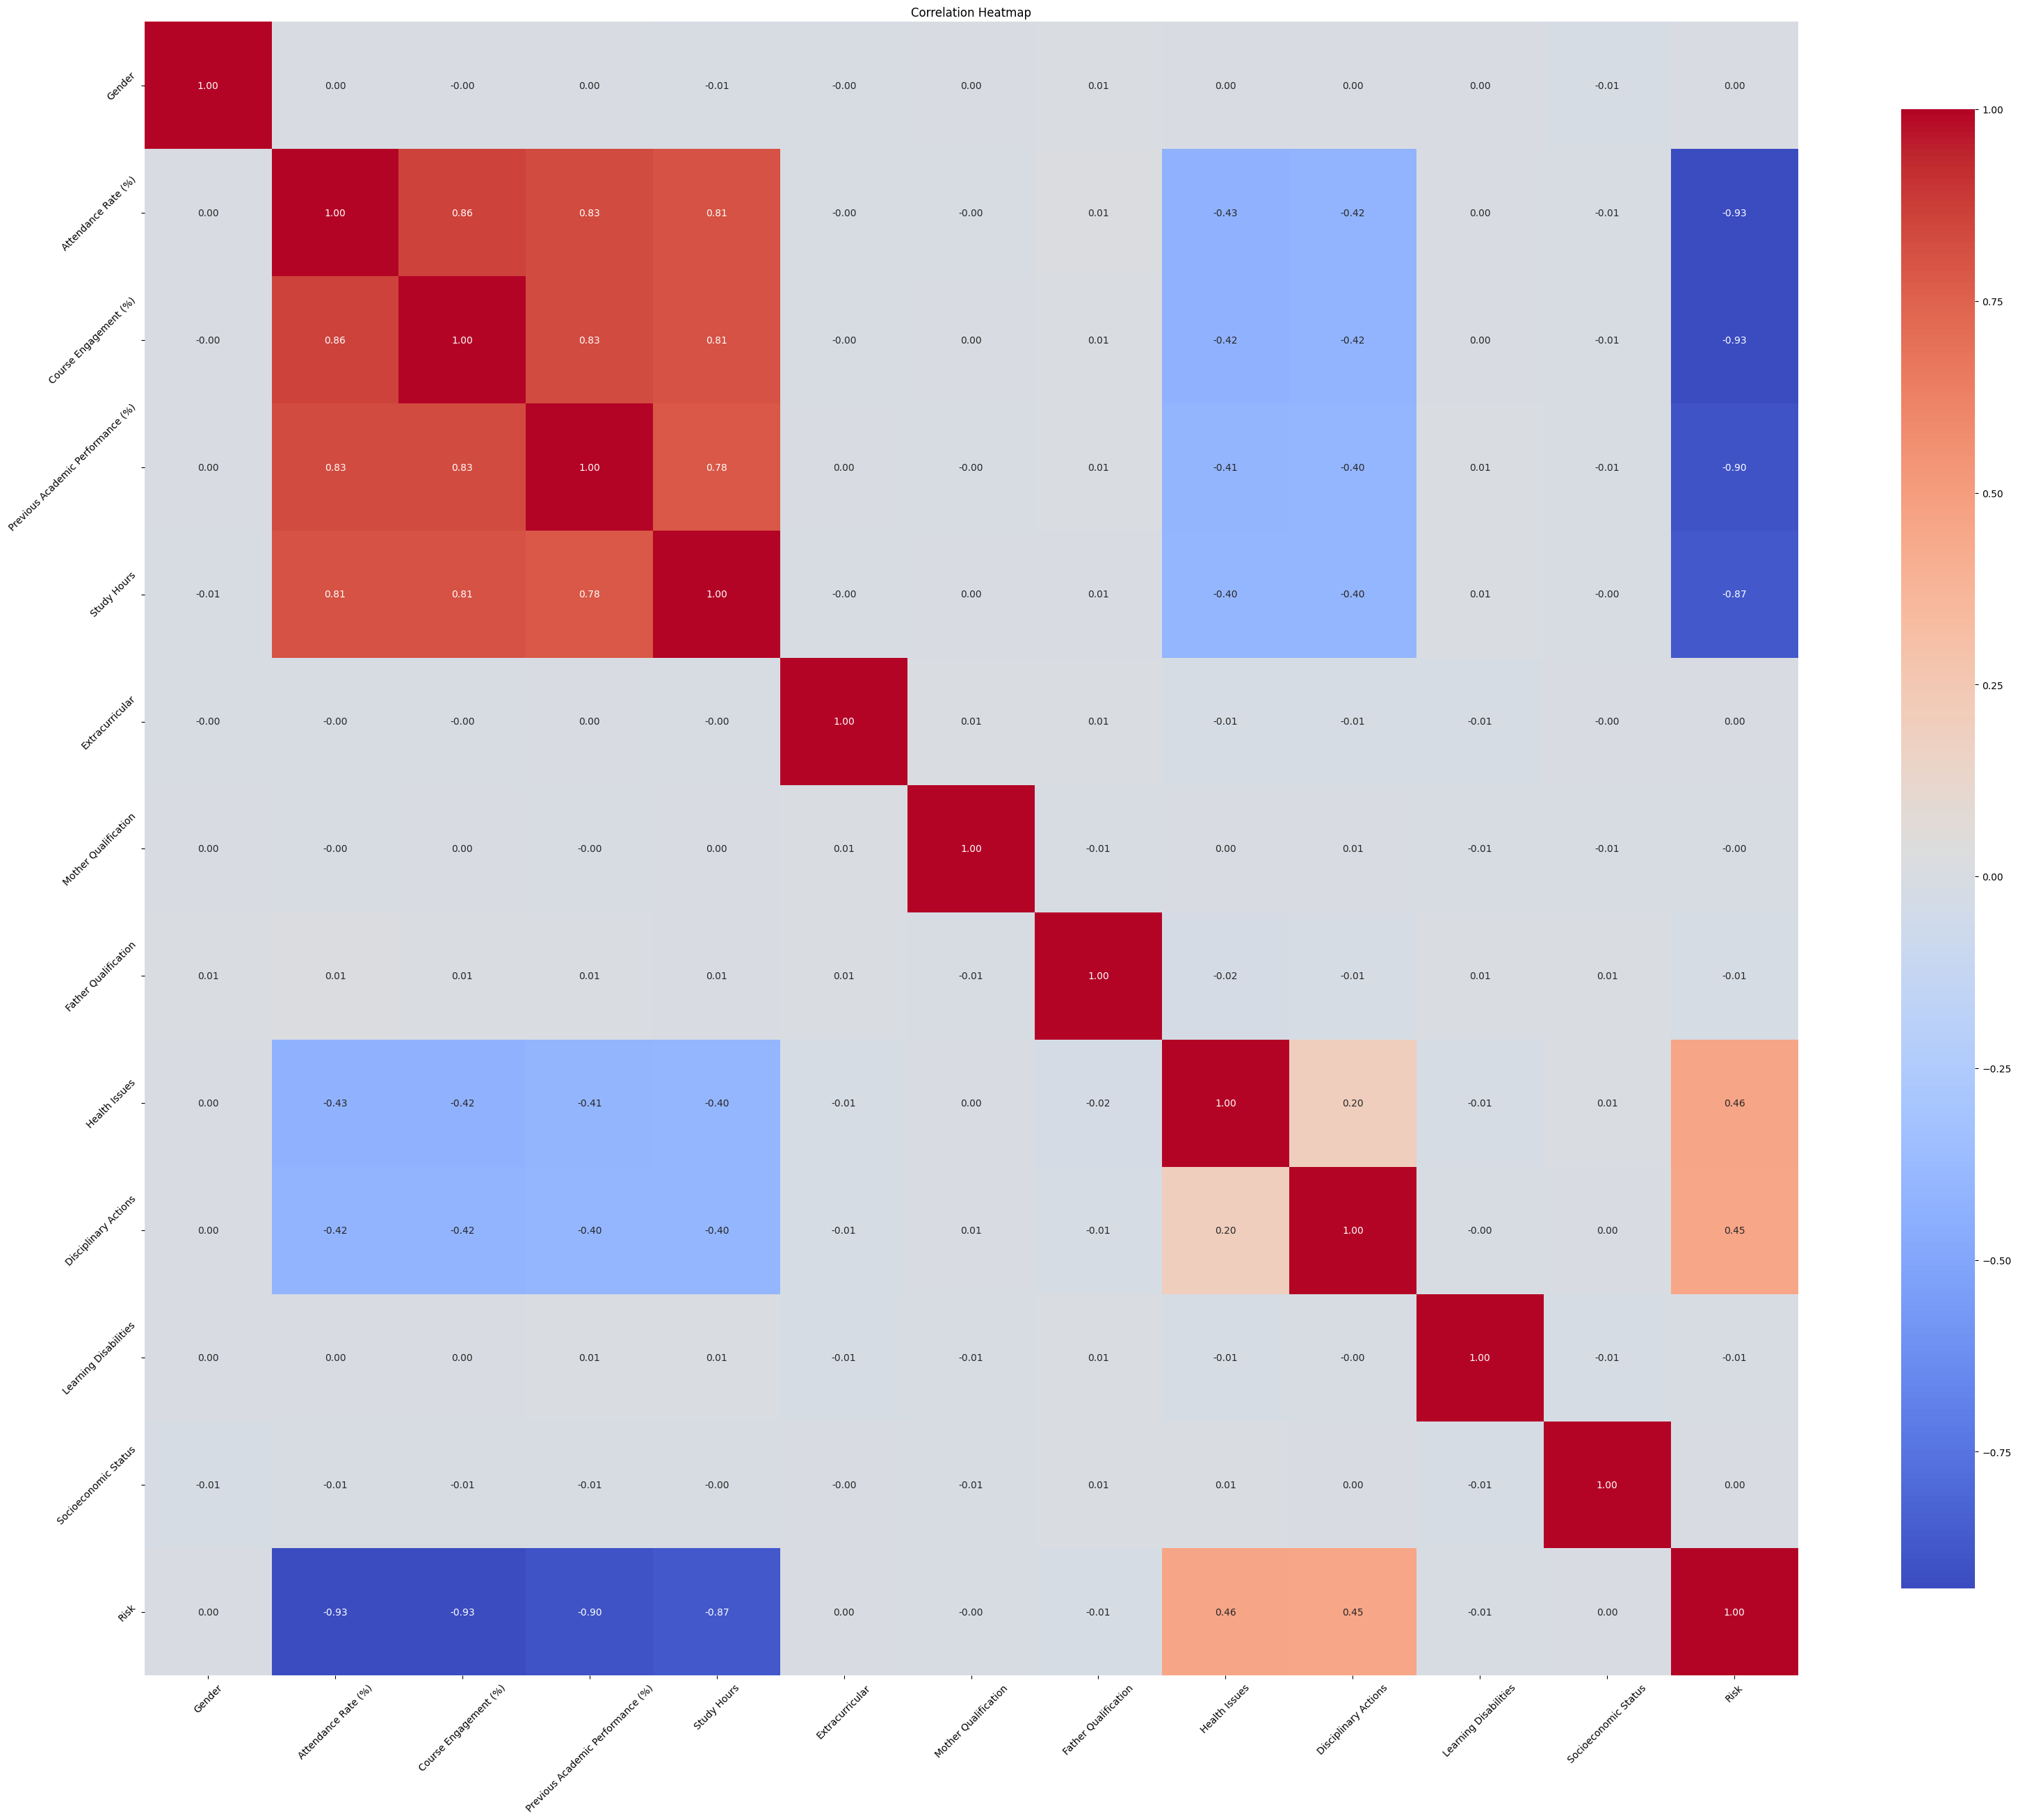

In [7]:
# Set the size of the heatmap
plt.figure(figsize=(32, 28))
# Create a heatmap
sns.heatmap(numerical_data.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
# Set titles and labels
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
# Show the plot
plt.show()

## Divide Dataset

In [8]:
data

,Gender,Attendance Rate (%),Course Engagement (%),Previous Academic Performance (%),Study Hours,Extracurricular,Mother Qualification,Father Qualification,Health Issues,Disciplinary Actions,Learning Disabilities,Socioeconomic Status,Risk
0,0,58.0,50.0,51.0,3.0,0,0,1,0,0,0,2,1
1,1,59.0,55.0,51.0,1.0,1,0,1,1,1,0,1,1
2,0,67.0,51.0,59.0,3.0,1,2,2,1,1,0,0,1
3,0,57.0,42.0,64.0,1.0,1,1,0,1,0,0,1,1
4,0,67.0,44.0,58.0,3.0,0,2,2,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,93.0,77.0,79.0,6.0,0,1,1,0,1,0,2,0
9996,0,84.0,85.0,79.0,7.0,1,1,1,0,0,0,0,0
9997,1,81.0,88.0,81.0,7.0,1,1,2,1,0,0,1,0
9998,1,94.0,83.0,89.0,6.0,1,1,2,0,0,0,0,0


In [9]:
import sklearn.metrics as sm

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
dataTransform = data.copy()
for dataset in data.columns:
  dataTransform[dataset] = labelencoder.fit_transform(data[dataset])

In [11]:
dataTransform

,Gender,Attendance Rate (%),Course Engagement (%),Previous Academic Performance (%),Study Hours,Extracurricular,Mother Qualification,Father Qualification,Health Issues,Disciplinary Actions,Learning Disabilities,Socioeconomic Status,Risk
0,0,8,10,1,2,0,0,1,0,0,0,2,1
1,1,9,15,1,0,1,0,1,1,1,0,1,1
2,0,17,11,9,2,1,2,2,1,1,0,0,1
3,0,7,2,14,0,1,1,0,1,0,0,1,1
4,0,17,4,8,2,0,2,2,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,34,28,25,5,0,1,1,0,1,0,2,0
9996,0,25,36,25,6,1,1,1,0,0,0,0,0
9997,1,22,39,27,6,1,1,2,1,0,0,1,0
9998,1,35,34,35,5,1,1,2,0,0,0,0,0


In [12]:
X = dataTransform.drop(['Risk'], axis = 1)

In [13]:
X

,Gender,Attendance Rate (%),Course Engagement (%),Previous Academic Performance (%),Study Hours,Extracurricular,Mother Qualification,Father Qualification,Health Issues,Disciplinary Actions,Learning Disabilities,Socioeconomic Status
0,0,8,10,1,2,0,0,1,0,0,0,2
1,1,9,15,1,0,1,0,1,1,1,0,1
2,0,17,11,9,2,1,2,2,1,1,0,0
3,0,7,2,14,0,1,1,0,1,0,0,1
4,0,17,4,8,2,0,2,2,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,34,28,25,5,0,1,1,0,1,0,2
9996,0,25,36,25,6,1,1,1,0,0,0,0
9997,1,22,39,27,6,1,1,2,1,0,0,1
9998,1,35,34,35,5,1,1,2,0,0,0,0


In [14]:
Y = dataTransform['Risk']

In [15]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Risk, Length: 10000, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [17]:
X_train.shape

(8000, 12)

In [18]:
X_test.shape

(2000, 12)

## Imbalanced dataset

In [19]:
Y_train.value_counts()

Risk
0    5195
1    2805
Name: count, dtype: int64

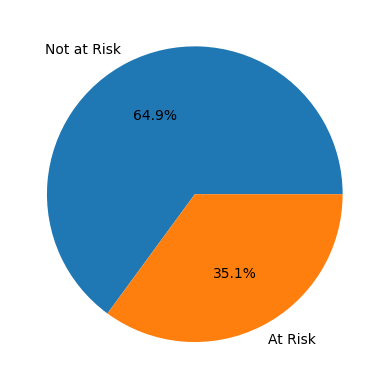

In [20]:
plt.pie(np.array([Y_train.value_counts()[0], Y_train.value_counts()[1]]), 
        labels=['Not at Risk', 'At Risk'], 
        autopct='%1.1f%%')  
plt.show()

### SMOTE

In [21]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)
print(X_train_smote.shape, Y_train_smote.shape)

(10390, 12) (10390,)


In [22]:
Y_train_smote.value_counts()

Risk
1    5195
0    5195
Name: count, dtype: int64

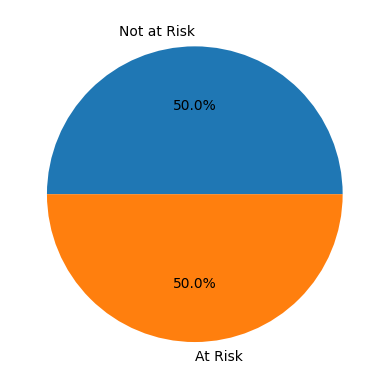

In [23]:
plt.pie(np.array([Y_train_smote.value_counts()[0], Y_train_smote.value_counts()[1]]), 
        labels=['Not at Risk', 'At Risk'], 
        autopct='%1.1f%%')  
plt.show()

In [24]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score, classification_report, roc_auc_score
import warnings
warnings.filterwarnings('ignore')
# Define the model and SMOTE object
model = RandomForestClassifier()

# Define a parameter grid for SMOTE
param_grid = {
    'smote__k_neighbors': [2, 3, 5, 7],
    'smote__sampling_strategy': [0.4, 0.5, 0.6, 0.7, 0.8]  
}

# Wrap SMOTE and the model in a pipeline
from imblearn.pipeline import Pipeline
smote = SMOTE()
pipeline = Pipeline([('smote', smote), ('model', model)])

# Define scoring based on F1 score (for minority class)
scorer = make_scorer(f1_score, pos_label=1)

# Run grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=scorer)
grid_search.fit(X_train, Y_train)

# Get the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best model to predict
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)

# Evaluate the performance
print(classification_report(Y_test, Y_pred, target_names=['Class 0', 'Class 1']))
roc_auc = roc_auc_score(Y_test, best_model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC After Hyperparameter Tuning: {roc_auc}")

Best parameters found:  {'smote__k_neighbors': 2, 'smote__sampling_strategy': 0.6}
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      1305
     Class 1       1.00      1.00      1.00       695

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

ROC-AUC After Hyperparameter Tuning: 1.0


In [25]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors=5, sampling_strategy=0.6)
X_train_smote_new, Y_train_smote_new = smote.fit_resample(X_train, Y_train)

# Print the shape of the resampled training set
print(X_train_smote_new.shape, X_train_smote_new.shape)

(8312, 12) (8312, 12)


In [26]:
from sklearn.metrics import make_scorer, f1_score, classification_report, roc_auc_score
# Initialize the classifier
model = RandomForestClassifier()

# Train the model
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Get classification report for Precision, Recall, and F1-Score
print("Before SMOTE:")
print(classification_report(Y_test, Y_pred, target_names=['Class 0', 'Class 1']))

# Compute ROC-AUC score
roc_auc = roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC: {roc_auc}")

Before SMOTE:
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      1305
     Class 1       1.00      1.00      1.00       695

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

ROC-AUC: 1.0


In [27]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, roc_auc_score

# Apply SMOTE
#smote = SMOTE()
#X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

# Retrain the model on the balanced dataset
model.fit(X_train_smote_new, Y_train_smote_new)

# Make predictions on the test set
Y_pred_smote = model.predict(X_test)

# Get classification report for Precision, Recall, and F1-Score
print("After SMOTE:")
print(classification_report(Y_test, Y_pred_smote, target_names=['Class 0', 'Class 1']))

# Compute ROC-AUC score
roc_auc_smote = roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC After SMOTE: {roc_auc_smote}")

After SMOTE:
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      1305
     Class 1       1.00      1.00      1.00       695

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

ROC-AUC After SMOTE: 1.0


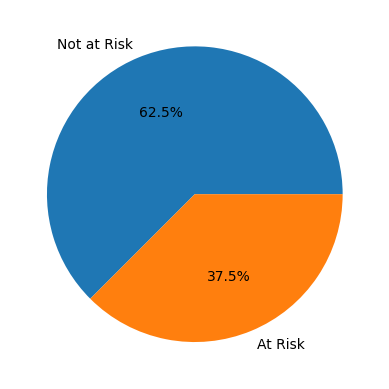

In [28]:
plt.pie(np.array([Y_train_smote_new.value_counts()[0], Y_train_smote_new.value_counts()[1]]), 
        labels=['Not at Risk', 'At Risk'], 
        autopct='%1.1f%%')  
plt.show()

In [29]:
X_train_smote

,Gender,Attendance Rate (%),Course Engagement (%),Previous Academic Performance (%),Study Hours,Extracurricular,Mother Qualification,Father Qualification,Health Issues,Disciplinary Actions,Learning Disabilities,Socioeconomic Status
0,1,13,17,11,0,1,1,2,1,0,0,2
1,1,35,34,20,9,0,1,0,0,0,1,1
2,1,25,24,34,5,1,1,2,0,0,0,0
3,1,33,26,34,5,0,0,0,0,0,0,0
4,0,30,27,19,8,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10385,1,2,3,4,1,0,1,1,0,0,0,0
10386,0,19,18,5,1,1,1,2,1,0,0,0
10387,1,10,8,8,2,0,1,0,0,0,0,0
10388,0,4,4,3,0,0,1,2,1,0,0,0


In [30]:
Y_train_smote

0        1
1        0
2        0
3        0
4        0
        ..
10385    1
10386    1
10387    1
10388    1
10389    1
Name: Risk, Length: 10390, dtype: int64

In [31]:
X_train_smote_new

,Gender,Attendance Rate (%),Course Engagement (%),Previous Academic Performance (%),Study Hours,Extracurricular,Mother Qualification,Father Qualification,Health Issues,Disciplinary Actions,Learning Disabilities,Socioeconomic Status
0,1,13,17,11,0,1,1,2,1,0,0,2
1,1,35,34,20,9,0,1,0,0,0,1,1
2,1,25,24,34,5,1,1,2,0,0,0,0
3,1,33,26,34,5,0,0,0,0,0,0,0
4,0,30,27,19,8,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8307,1,12,18,3,2,0,1,0,0,0,0,1
8308,0,20,10,12,1,0,1,1,0,0,0,1
8309,0,16,12,10,1,0,1,1,0,1,0,0
8310,0,18,3,1,1,1,2,1,0,1,0,0


In [32]:
Y_train_smote_new

0       1
1       0
2       0
3       0
4       0
       ..
8307    1
8308    1
8309    1
8310    1
8311    1
Name: Risk, Length: 8312, dtype: int64

## Model Training and Evaluation

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [34]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

#X_train, X_test, Y_train, Y_test = train_test_split(data.drop('Risk', axis=1), data['Risk'], test_size=0.2, random_state=42)

#X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

### Logistic Regression

In [35]:

# Train the Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train_smote_new, Y_train_smote_new)

# Make predictions
y_train_pred = lr.predict(X_train_smote_new)
y_test_pred = lr.predict(X_test)

# Evaluate the model
training_scores(Y_train_smote_new, y_train_pred)
validation_scores(Y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0


In [36]:
lr = LogisticRegression()
# Retrain the model on the balanced dataset
lr.fit(X_train_smote_new, Y_train_smote_new)

# Make predictions on the test set
Y_pred_smote_train = lr.predict(X_train_smote_new)
Y_pred_smote_test = lr.predict(X_test)

training_scores(Y_train_smote_new, Y_pred_smote_train)
validation_scores(Y_test, Y_pred_smote_test)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0


### Naive Bayes

In [37]:
gnb = GaussianNB()
gnb.fit(X_train_smote_new, Y_train_smote_new)

y_train_pred = gnb.predict(X_train_smote_new)
y_test_pred = gnb.predict(X_test)

training_scores(Y_train_smote_new, y_train_pred)
validation_scores(Y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0


### Decision Tree

In [38]:
dt = DecisionTreeClassifier()

dt.fit(X_train_smote_new, Y_train_smote_new)

y_train_pred = dt.predict(X_train_smote_new)

y_test_pred = dt.predict(X_test)

training_scores(Y_train_smote_new, y_train_pred)
validation_scores(Y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0


### Random Forest

In [39]:
rf = RandomForestClassifier()

rf.fit(X_train_smote_new, Y_train_smote_new)

y_train_pred = rf.predict(X_train_smote_new)

y_test_pred = rf.predict(X_test)

training_scores(Y_train_smote_new, y_train_pred)

validation_scores(Y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0


### Support Vector Machine

In [40]:
svm = SVC()

svm.fit(X_train_smote_new, Y_train_smote_new)

y_train_pred = svm.predict(X_train_smote_new)

y_test_pred = svm.predict(X_test)

training_scores(Y_train_smote_new, y_train_pred)

validation_scores(Y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0


Text(110.44999999999997, 0.5, 'predicted class axis')

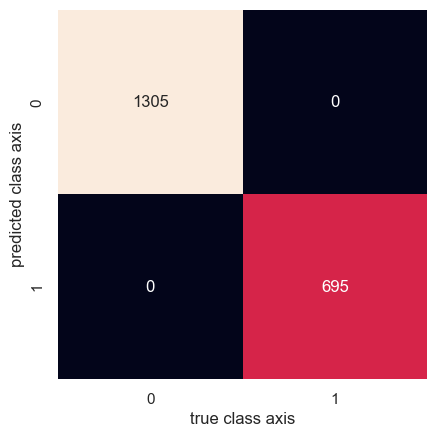

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
sb.set()
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
confusionmt = confusion_matrix(Y_test,y_test_pred)
sb.heatmap(confusionmt.T, square=True, annot=True, fmt='d',cbar=False)
plt.xlabel('true class axis')
plt.ylabel('predicted class axis')

In [42]:
import pickle
with open ('../static/model/model_new.pickle', 'wb') as file:
    pickle.dump(rf, file)

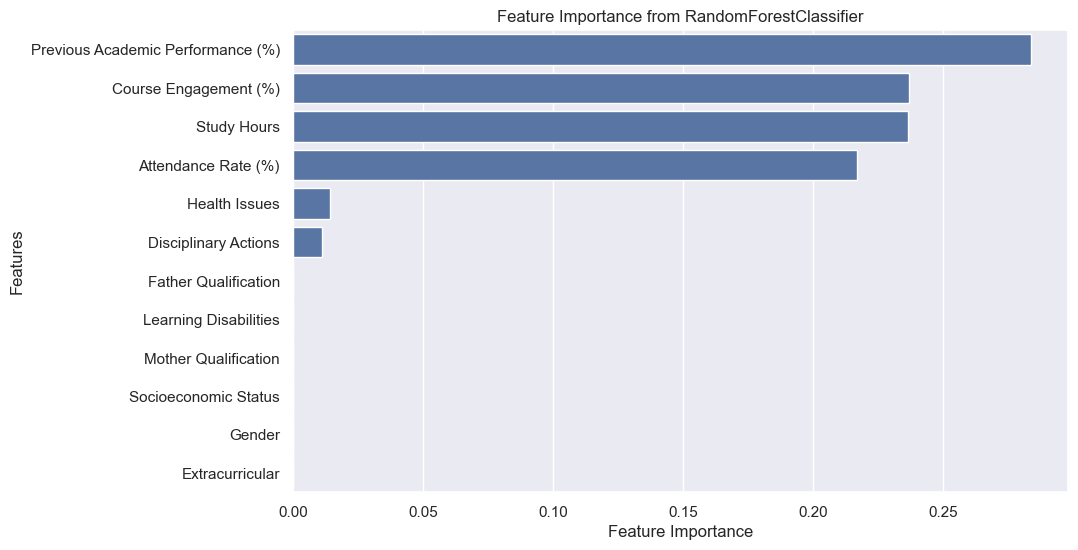

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the feature importances from the RandomForestClassifier
feature_importances = rf.feature_importances_

# Create a sorted list of feature names and their corresponding importance values
features_sorted = sorted(zip(X_train_smote.columns, feature_importances), key=lambda x: x[1], reverse=True)

# Unzip the sorted list into separate lists for feature names and importance values
feature_names, importance_values = zip(*features_sorted)

# Create a bar plot using seaborn or matplotlib
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_values, y=feature_names)

# Add plot labels and title
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance from RandomForestClassifier")

# Display the plot
plt.show()

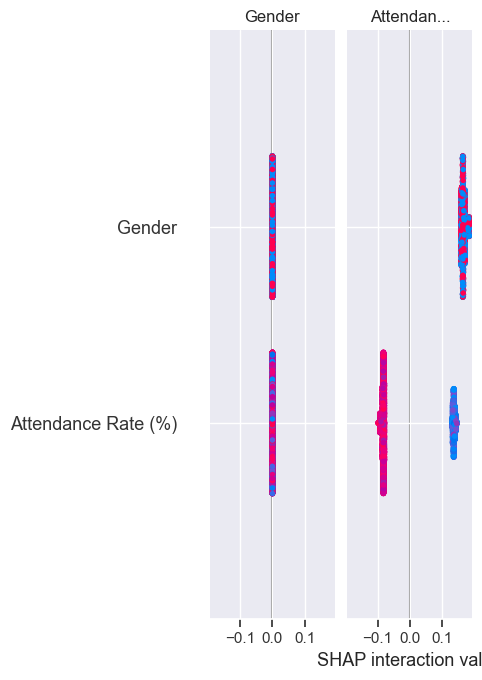

In [44]:
import shap

# Initialize the SHAP explainer for your Random Forest model
explainer = shap.TreeExplainer(rf)

# Calculate SHAP values for the entire dataset (can sample if the dataset is too large)
shap_values = explainer.shap_values(X_train_smote_new)

# Generate the SHAP summary plot for global feature importance
shap.summary_plot(shap_values, X_train_smote_new)

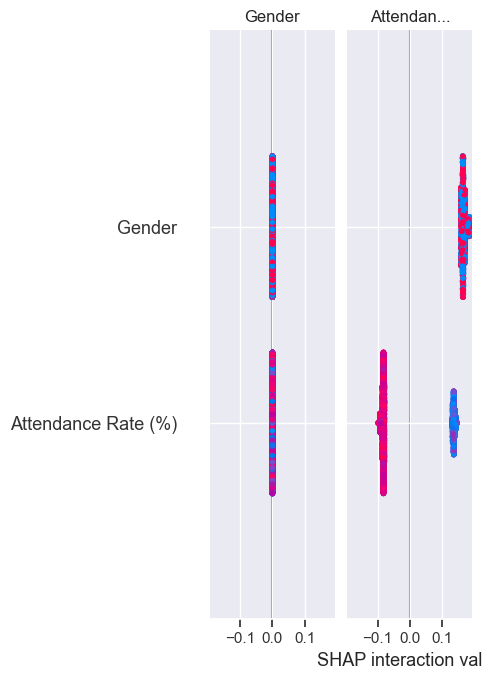

In [45]:
import shap

# Initialize the SHAP explainer for your Random Forest model
explainer = shap.TreeExplainer(rf)

# Calculate SHAP values for the entire dataset (can sample if the dataset is too large)
shap_values = explainer.shap_values(X_train)

# Generate the SHAP summary plot for global feature importance
shap.summary_plot(shap_values, X_train)

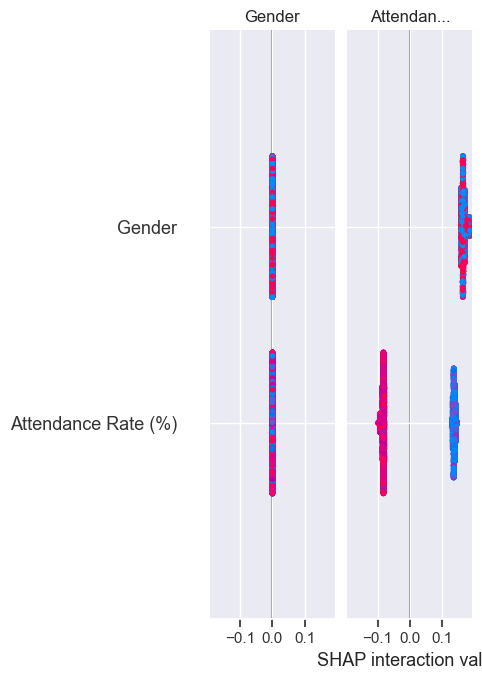

In [46]:
import shap

# Assuming 'rf' is your trained Random Forest model and 'X_train_smote' is your training dataset
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train_smote)

# Plot the summary
shap.summary_plot(shap_values, X_train_smote, plot_type="bar")


In [47]:
print(X_train_smote.columns)

Index(['Gender', 'Attendance Rate (%)', 'Course Engagement (%)',
       'Previous Academic Performance (%)', 'Study Hours', 'Extracurricular',
       'Mother Qualification', 'Father Qualification', 'Health Issues',
       'Disciplinary Actions', 'Learning Disabilities',
       'Socioeconomic Status'],
      dtype='object')


In [48]:
print(type(shap_values))
print(len(shap_values))
if isinstance(shap_values, list):
    print([x.shape for x in shap_values])  # Print the shape of each element if it's a list
else:
    print(shap_values.shape)  # Print the shape if it's not a list


<class 'numpy.ndarray'>
10390
(10390, 12, 2)


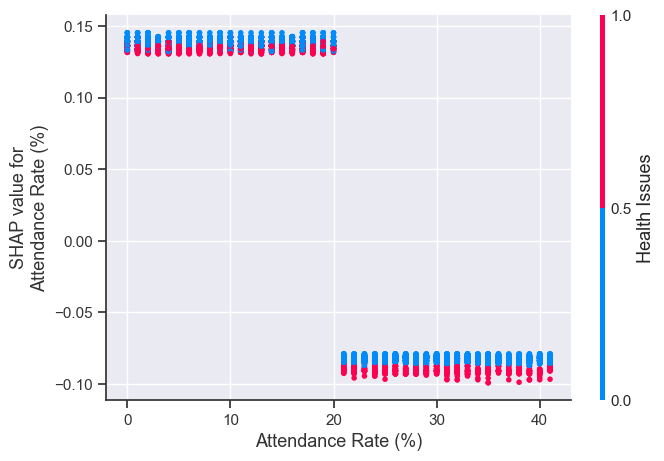

In [49]:
# Generate a dependence plot for 'Attendance Rate (%)'
shap.dependence_plot('Attendance Rate (%)', shap_values[:, :, 1], X_train_smote, interaction_index="auto")


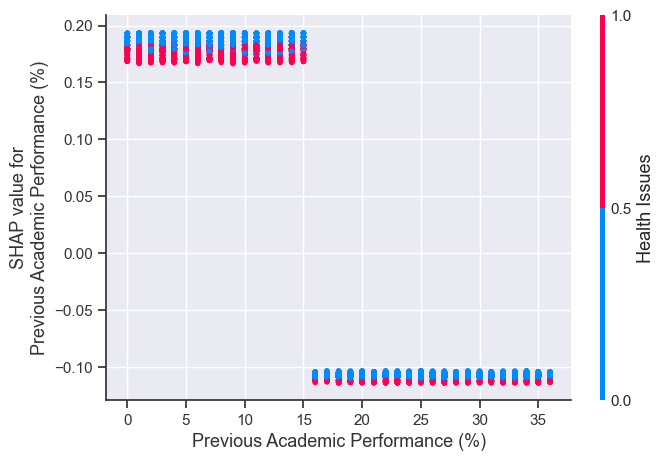

In [50]:
# Generate a dependence plot for 'Previous Academic Performance (%)'
shap.dependence_plot('Previous Academic Performance (%)', shap_values[:, :, 1], X_train_smote, interaction_index="auto")

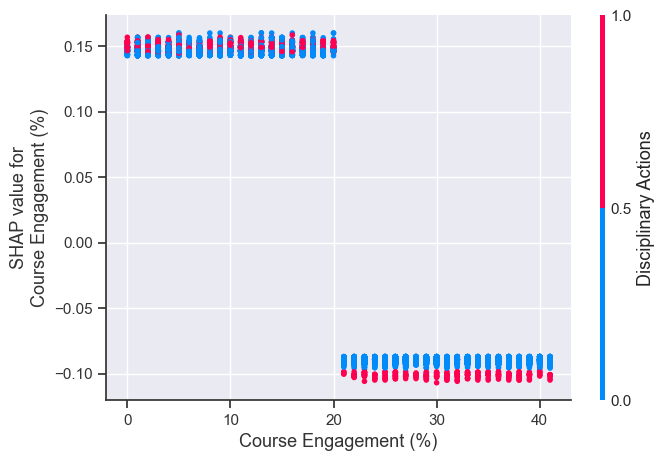

In [51]:
# Generate a dependence plot for 'Course Engagement (%)'
shap.dependence_plot('Course Engagement (%)', shap_values[:, :, 1], X_train_smote, interaction_index="auto")